In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
df=pd.read_stata("/content/binary.dta")

In [3]:
print(df)

     admit    gre   gpa  rank
0      0.0  380.0  3.61   3.0
1      1.0  660.0  3.67   3.0
2      1.0  800.0  4.00   1.0
3      1.0  640.0  3.19   4.0
4      0.0  520.0  2.93   4.0
..     ...    ...   ...   ...
395    0.0  620.0  4.00   2.0
396    0.0  560.0  3.04   3.0
397    0.0  460.0  2.63   2.0
398    0.0  700.0  3.65   2.0
399    0.0  600.0  3.89   3.0

[400 rows x 4 columns]


In [4]:
df.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[["gre", "gpa", "rank"]], df["admit"], test_size=0.2)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

In [6]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

In [7]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix)
acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy in percentage: ", acc_score*100, "%")


Confusion Matrix: [[46  3]
 [24  7]]
Accuracy in percentage:  66.25 %


<Axes: xlabel='Predicted', ylabel='Actual'>

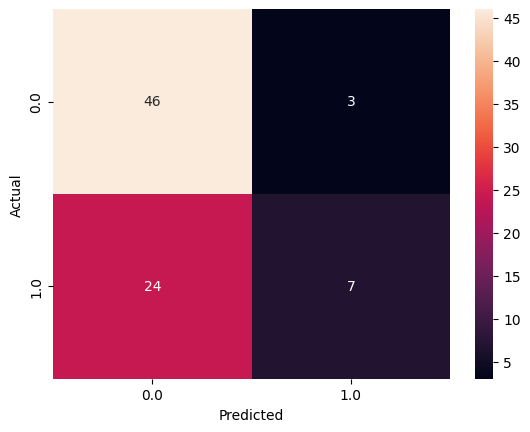

In [9]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
sn.heatmap(conf_mat, annot=True)